In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
# Prepare the train set
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

In [3]:
# Calculate gradient
w1 = torch.Tensor([1.0])
w1.requires_grad = True
w2 = torch.Tensor([1.0])
w2.requires_grad = True
b = torch.Tensor([1.0])
b.requires_grad = True

In [4]:
# Define the model
def forward(x):
    return w1 * x**2 + w2 * x + b

In [5]:
# Define the loss function
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) ** 2

In [6]:
epoch_list = []
cost_list = []

In [7]:
print('Predict (before training)', 4, forward(4).item())

for epoch in range(10000):
    cost = 0
    for x, y in zip(x_data, y_data):
        # Forward, compute the loss
        l = loss(x, y)
        # Backward, compute grad for Tensor whose requires_grad set to True
        l.backward()
#         print('\tgrad:', x, y, w1.grad.item(), w2.grad.item(), b.grad.item())
        cost += l.item()
        w1.data = w1.data - 0.01 * w1.grad.data
        w2.data = w2.data - 0.01 * w2.grad.data
        b.data = b.data - 0.01 * b.grad.data
        
        # After update, remember set the grad to ZERO!!!
        w1.grad.data.zero_()
        w2.grad.data.zero_()
        b.grad.data.zero_()
    
    epoch_list.append(epoch)
    cost_list.append(cost / len(x_data))
#     print('progress:', epoch, l.item())
    
print('Predict (after training)', 4, forward(4).item())

Predict (before training) 4 21.0
Predict (after training) 4 8.0020112991333


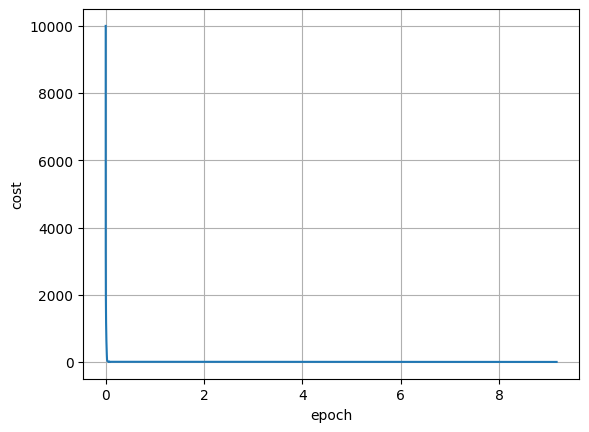

In [8]:
plt.plot(cost_list,epoch_list)
plt.xlabel('epoch')
plt.ylabel('cost')
plt.grid(True)
plt.show()